<a href="https://colab.research.google.com/github/Dewak20/Dibimbing/blob/main/Dewa_Gede_Krishnadana_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cluster Analysis of E-Commerce Dataset

## Introduction

Business team want to create "Lolayty Customer" campaign by giving voucher based on certain condition. But, of course, we don't want to give vouchers sporadically. Then they want you to check which users that will be injected by voucher based on their loyalty to your platform.

# Install and Load Packages

In [53]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

from scipy.spatial import ConvexHull

from datetime import datetime

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

# Load Dataset

In [55]:
raw_data = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/superstore_dataset/global_superstore.csv")
raw_data.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,32298,CA-2012-124891,2012-07-31T00:00:00Z,2012-07-31T00:00:00Z,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05T00:00:00Z,2013-02-07T00:00:00Z,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17T00:00:00Z,2013-10-18T00:00:00Z,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28T00:00:00Z,2013-01-30T00:00:00Z,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05T00:00:00Z,2013-11-06T00:00:00Z,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


# RFM Analysis

## Data Preprocessing

Check `raw_data` structure

In [56]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row_id          51290 non-null  int64  
 1   order_id        51290 non-null  object 
 2   order_date      51290 non-null  object 
 3   ship_date       51290 non-null  object 
 4   ship_mode       51290 non-null  object 
 5   customer_id     51290 non-null  object 
 6   customer_name   51290 non-null  object 
 7   segment         51290 non-null  object 
 8   city            51290 non-null  object 
 9   state           51290 non-null  object 
 10  country         51290 non-null  object 
 11  postal_code     9994 non-null   float64
 12  market          51290 non-null  object 
 13  region          51290 non-null  object 
 14  product_id      51290 non-null  object 
 15  category        51290 non-null  object 
 16  sub_category    51290 non-null  object 
 17  product_name    51290 non-null 

Check null values inside dataset

In [57]:
raw_data.isna().sum()

row_id                0
order_id              0
order_date            0
ship_date             0
ship_mode             0
customer_id           0
customer_name         0
segment               0
city                  0
state                 0
country               0
postal_code       41296
market                0
region                0
product_id            0
category              0
sub_category          0
product_name          0
sales                 0
quantity              0
discount              0
profit                0
shipping_cost         0
order_priority        0
dtype: int64

Remove null values

In [58]:
raw_data = raw_data.drop('postal_code', axis=1)

Recheck null data

In [59]:
raw_data.isna().sum()

row_id            0
order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
segment           0
city              0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
dtype: int64

In [60]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row_id          51290 non-null  int64  
 1   order_id        51290 non-null  object 
 2   order_date      51290 non-null  object 
 3   ship_date       51290 non-null  object 
 4   ship_mode       51290 non-null  object 
 5   customer_id     51290 non-null  object 
 6   customer_name   51290 non-null  object 
 7   segment         51290 non-null  object 
 8   city            51290 non-null  object 
 9   state           51290 non-null  object 
 10  country         51290 non-null  object 
 11  market          51290 non-null  object 
 12  region          51290 non-null  object 
 13  product_id      51290 non-null  object 
 14  category        51290 non-null  object 
 15  sub_category    51290 non-null  object 
 16  product_name    51290 non-null  object 
 17  sales           51290 non-null 

Turn InvoiceDate into date type and create GMV = Quantity * Price

In [61]:
raw_data1 = raw_data.groupby('category')['quantity', 'profit'].sum()
raw_data1['quanperc'] = raw_data1['quantity'].cumsum()/raw_data1['quantity'].sum()*100
raw_data1['properc'] = raw_data1['profit'].cumsum()/raw_data1['profit'].sum()*100
raw_data1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,quantity,profit,quanperc,properc
category,,,,
Furniture,34954,285204.72380,19.602719,19.435300
Office Supplies,108182,518473.83430,80.272780,54.766743
Technology,35176,663778.73318,100.000000,100.000000


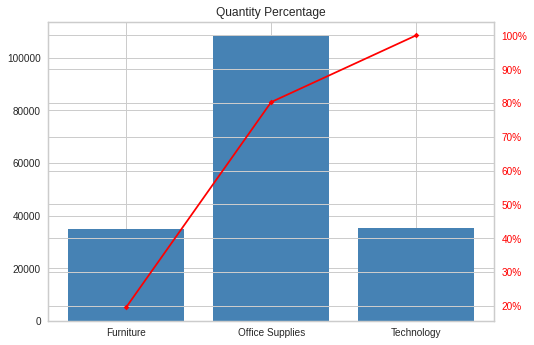

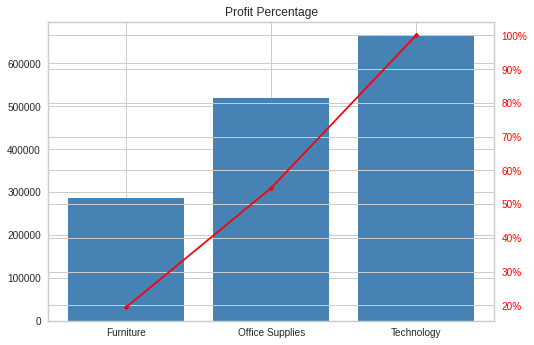

In [62]:

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax2 = plt.subplots()
ax2.bar(raw_data1.index, raw_data1['quantity'], color=color1)

#add cumulative percentage line to plot
ax2 = ax2.twinx()
ax2.plot(raw_data1.index, raw_data1['quanperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax2.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)
ax2.set(title='Quantity Percentage')

#create basic bar plot
fig, ax1 = plt.subplots()
ax1.bar(raw_data1.index, raw_data1['profit'], color=color1)

#add cumulative percentage line to plot
ax1 = ax1.twinx()
ax1.plot(raw_data1.index, raw_data1['properc'], color=color2, marker="D", ms=line_size)
ax1.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax1.tick_params(axis='y', colors=color1)
ax1.tick_params(axis='y', colors=color2)
ax1.set(title='Profit Percentage')
#display Pareto chart

plt.show()

In [63]:
raw_data2 = raw_data.groupby('sub_category')['quantity', 'profit'].sum()
raw_data2['quanperc'] = raw_data2['quantity'].cumsum()/raw_data2['quantity'].sum()*100
raw_data2['properc'] = raw_data2['profit'].cumsum()/raw_data2['profit'].sum()*100
raw_data2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,quantity,profit,quanperc,properc
sub_category,,,,
Accessories,10946,129626.30620,6.138678,8.833395
Appliances,6078,141680.58940,9.547310,18.488231
Art,16301,57953.91090,18.689152,22.437505
Binders,21429,72449.84600,30.706851,27.374606
Bookcases,8310,161924.41950,35.367221,38.408959
Chairs,12336,140396.26750,42.285432,47.976275
Copiers,7454,258567.54818,46.465745,65.596382
Envelopes,8380,29601.11630,51.165373,67.613552
Fasteners,8390,11525.42410,55.870609,68.398953


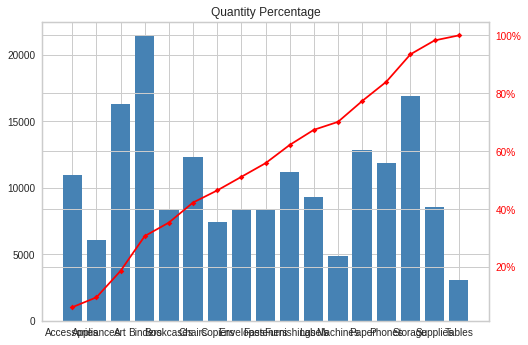

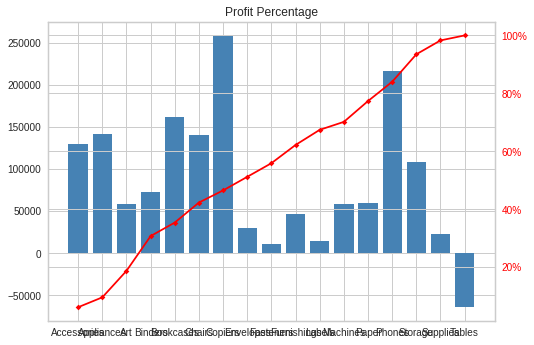

In [64]:
#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax2 = plt.subplots()
ax2.bar(raw_data2.index, raw_data2['quantity'], color=color1)

#add cumulative percentage line to plot
ax2 = ax2.twinx()
ax2.plot(raw_data2.index, raw_data2['quanperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax2.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)
ax2.set(title='Quantity Percentage')

#create basic bar plot
fig, ax2 = plt.subplots()
ax2.bar(raw_data2.index, raw_data2['profit'], color=color1)

#add cumulative percentage line to plot
ax2 = ax2.twinx()
ax2.plot(raw_data2.index, raw_data2['quanperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax2.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)
ax2.set(title='Profit Percentage')
plt.show()

In [65]:
raw_data3 = raw_data.groupby('region')['quantity', 'profit'].sum()
raw_data3['properc'] = raw_data3['profit'].cumsum()/raw_data3['profit'].sum()*100
raw_data3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,quantity,profit,properc
region,,,
Africa,10564,88871.63100,6.056165
Canada,833,17817.39000,7.270332
Caribbean,6299,34571.32104,9.626198
Central,41762,311403.98164,30.846848
Central Asia,7715,132480.18700,39.874722
EMEA,11517,43897.97100,42.866153
East,10618,91522.78000,49.102980
North,18021,194597.95252,62.363874
North Asia,8851,165578.42100,73.647229


[Text(0.5, 1.0, 'Profit Percentage')]

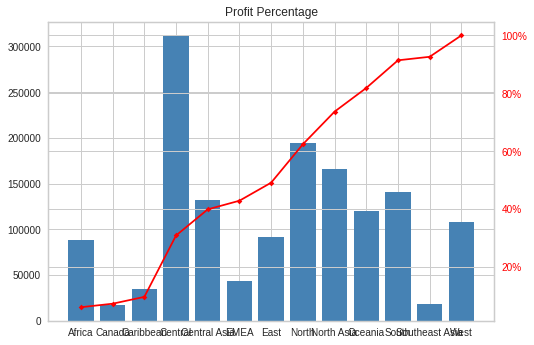

In [66]:
#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax2 = plt.subplots()
ax2.bar(raw_data3.index, raw_data3['profit'], color=color1)

#add cumulative percentage line to plot
ax2 = ax2.twinx()
ax2.plot(raw_data3.index, raw_data3['properc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax2.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)
ax2.set(title='Profit Percentage')

In [67]:
raw_data4 = raw_data.groupby('city')['quantity', 'profit'].sum()
raw_data4['properc'] = raw_data4['profit'].cumsum()/raw_data4['profit'].sum()*100
raw_data4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,quantity,profit,properc
city,,,
Aachen,60,1116.981,0.076117
Aalen,3,283.005,0.095402
Aalst,15,152.310,0.105781
Aba,52,-1475.556,0.005229
Abadan,19,233.820,0.021163
...,...,...,...
Zwedru,1,11.850,99.998709
Zwickau,8,19.380,100.000030
Zwolle,10,-55.095,99.996275


[Text(0.5, 1.0, 'Profit Percentage')]

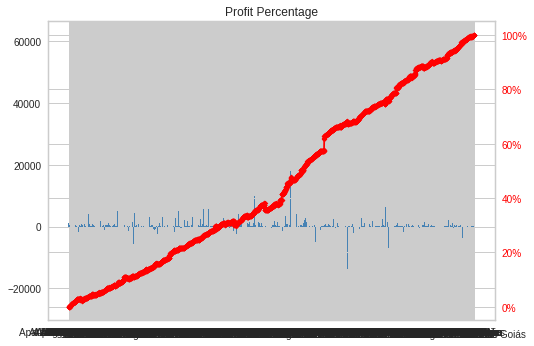

In [68]:
#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax2 = plt.subplots()
ax2.bar(raw_data4.index, raw_data4['profit'], color=color1)

#add cumulative percentage line to plot
ax2 = ax2.twinx()
ax2.plot(raw_data4.index, raw_data4['properc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax2.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)
ax2.set(title='Profit Percentage')

In [69]:
raw_data5 = raw_data[raw_data['discount'] != 0]
raw_data6 = raw_data5.groupby(['category'])['quantity', 'profit'].sum()
raw_data6['quanperc'] = raw_data5['quantity'].cumsum()/raw_data5['quantity'].sum()*100
raw_data6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,quantity,profit,quanperc
category,,,
Furniture,19749,-180408.23260,NaN
Office Supplies,42651,-90251.45210,NaN
Technology,17144,-32578.29722,NaN


[Text(0.5, 1.0, 'Profit Percentage')]

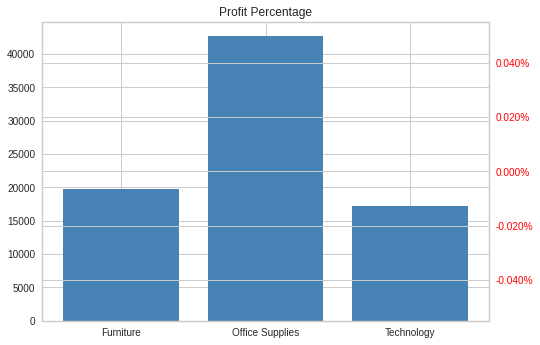

In [70]:
#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax2 = plt.subplots()
ax2.bar(raw_data6.index, raw_data6['quantity'], color=color1)

#add cumulative percentage line to plot
ax2 = ax2.twinx()
ax2.plot(raw_data6.index, raw_data6['quanperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax2.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)
ax2.set(title='Profit Percentage')

Turn Order date into date type and create GMV = Sales * Quantity

In [71]:
raw_data

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,32298,CA-2012-124891,2012-07-31T00:00:00Z,2012-07-31T00:00:00Z,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.570,Critical
1,26341,IN-2013-77878,2013-02-05T00:00:00Z,2013-02-07T00:00:00Z,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical
2,25330,IN-2013-71249,2013-10-17T00:00:00Z,2013-10-18T00:00:00Z,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium
3,13524,ES-2013-1579342,2013-01-28T00:00:00Z,2013-01-30T00:00:00Z,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium
4,47221,SG-2013-4320,2013-11-05T00:00:00Z,2013-11-06T00:00:00Z,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19T00:00:00Z,2014-06-19T00:00:00Z,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.010,Medium
51286,35398,US-2014-102288,2014-06-20T00:00:00Z,2014-06-24T00:00:00Z,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.010,Medium
51287,40470,US-2013-155768,2013-12-02T00:00:00Z,2013-12-02T00:00:00Z,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.010,High
51288,9596,MX-2012-140767,2012-02-18T00:00:00Z,2012-02-22T00:00:00Z,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.003,Medium


In [72]:
raw_data['GMV'] = raw_data['sales'] * raw_data['quantity']
raw_data.head(5)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,GMV
0,32298,CA-2012-124891,2012-07-31T00:00:00Z,2012-07-31T00:00:00Z,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,16167.550
1,26341,IN-2013-77878,2013-02-05T00:00:00Z,2013-02-07T00:00:00Z,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,33384.555
2,25330,IN-2013-71249,2013-10-17T00:00:00Z,2013-10-18T00:00:00Z,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,46576.539
3,13524,ES-2013-1579342,2013-01-28T00:00:00Z,2013-01-30T00:00:00Z,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,14462.550
4,47221,SG-2013-4320,2013-11-05T00:00:00Z,2013-11-06T00:00:00Z,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,22663.680


In [78]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   row_id          51290 non-null  int64  
 1   order_id        51290 non-null  object 
 2   order_date      51290 non-null  object 
 3   ship_date       51290 non-null  object 
 4   ship_mode       51290 non-null  object 
 5   customer_id     51290 non-null  object 
 6   customer_name   51290 non-null  object 
 7   segment         51290 non-null  object 
 8   city            51290 non-null  object 
 9   state           51290 non-null  object 
 10  country         51290 non-null  object 
 11  market          51290 non-null  object 
 12  region          51290 non-null  object 
 13  product_id      51290 non-null  object 
 14  category        51290 non-null  object 
 15  sub_category    51290 non-null  object 
 16  product_name    51290 non-null  object 
 17  sales           51290 non-null 

In [79]:
raw_data["order_date"] = pd.to_datetime(raw_data['order_date'])

In [80]:
raw_data['order_date'].max()

Timestamp('2014-12-31 00:00:00+0000', tz='UTC')

In [81]:
analysis_date = raw_data['order_date'].max()

In [82]:
data_for_model = raw_data.groupby(['customer_id'], as_index=False).agg({
        'order_date': lambda x: (analysis_date - x.max()).days,
        'order_id': 'count',
        'GMV': 'sum'})

In [86]:
data_for_model.rename(columns={'order_date': 'Recency',
                         'order_id': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

In [87]:
data_for_model = data_for_model[data_for_model['GMV'] > 0]

Check final data for customer segmentation

In [88]:
data_for_model

,customer_id,Recency,Frequency,GMV
0,AA-10315,8,42,56735.25400
1,AA-10375,6,42,23893.63700
2,AA-10480,125,38,89517.09654
3,AA-10645,28,73,72217.61334
4,AA-315,2,8,7865.97600
...,...,...,...,...
1585,YS-21880,9,54,96423.61400
1586,ZC-11910,200,1,7.17300
1587,ZC-21910,3,84,155687.54878
1588,ZD-11925,3,18,11160.13200


##RFM Segmentation

Create RFM segmentation by using rfm_table_order function

In [89]:
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

r_groups = pd.qcut(data_for_model['Recency'], q=4, labels = r_labels)
f_groups = pd.qcut(data_for_model['Frequency'], q=4, labels = f_labels)
m_groups = pd.qcut(data_for_model['GMV'], q=4, labels = m_labels)

In [91]:
data_for_model = data_for_model.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)

In [92]:
data_for_model['rfm_score'] = data_for_model[['R','F','M']].apply(
    lambda x: ''.join(x.astype(str)),
    axis=1
)

In [93]:
data_for_model['rfm_score'] = data_for_model['rfm_score'].astype('int')

In [94]:
data_for_model.head()

,customer_id,Recency,Frequency,GMV,R,F,M,rfm_score
0,AA-10315,8,42,56735.25400,4,3,3,433
1,AA-10375,6,42,23893.63700,4,3,2,432
2,AA-10480,125,38,89517.09654,1,3,4,134
3,AA-10645,28,73,72217.61334,3,4,4,344
4,AA-315,2,8,7865.97600,4,1,2,412


#Post-Segmentation Analysis

Heatmap Visualization

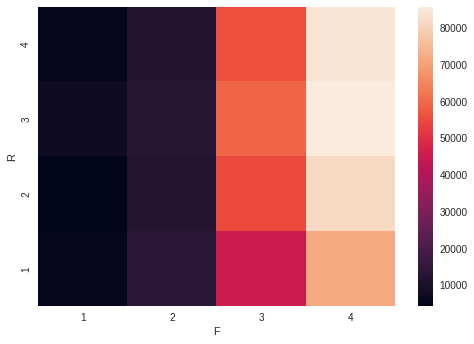

In [95]:
sns.heatmap(
    pd.pivot_table(data_for_model[["R", "F","GMV"]], values = "GMV", index = ["R"], columns = ["F"])
)

**RFM Distribution**

In [96]:
rfm_bar_data = data_for_model[["R", "F", "M"]].groupby(["R","F","M"], as_index = False).size()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


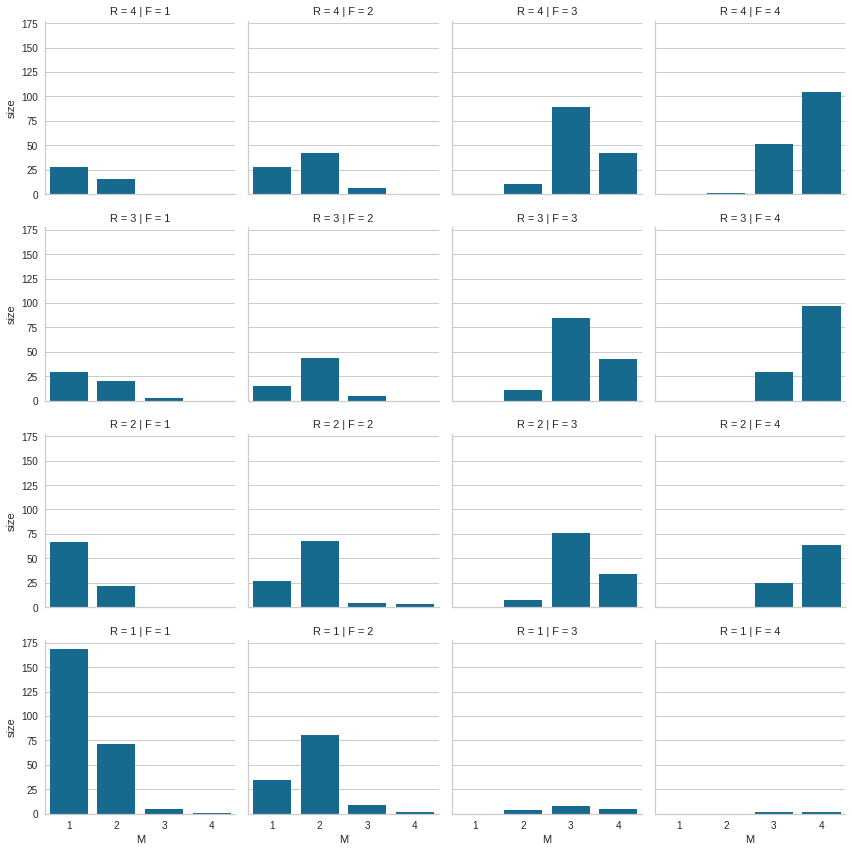

In [97]:
g = sns.FacetGrid(
    data = rfm_bar_data,
    col = "F",
    row = "R"
)
g.map(sns.barplot, "M", "size");

**Recency, Frequency, and GMV Distribution**

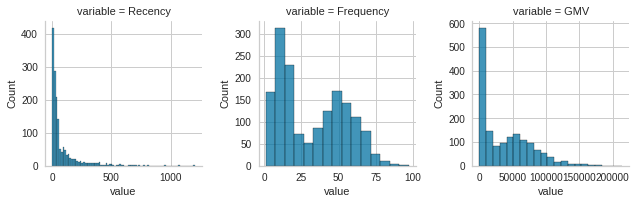

In [98]:
g = sns.FacetGrid(
    data = pd.melt(
     data_for_model[["Recency", "Frequency","GMV"]],
     value_vars=["Recency","Frequency", "GMV"]
    ),
    col = "variable",
    sharex = False,
    sharey = False
)
g.map(sns.histplot, "value");

RFM Score to RFM Segment

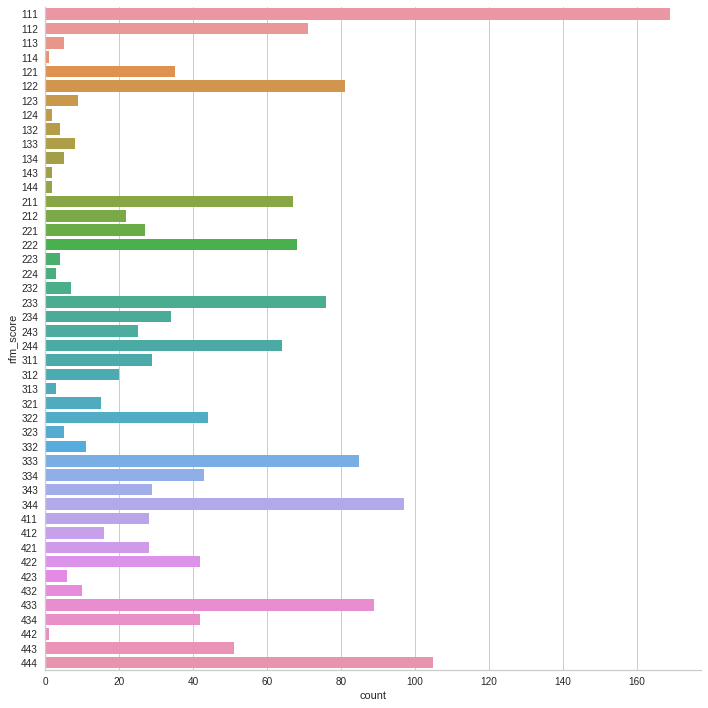

In [99]:
sns.catplot(
    y = "rfm_score", 
    data = data_for_model.sort_values(by = ["rfm_score"], axis = 0), 
    kind = "count", 
    height = 10
)

In [100]:
data_for_model['rfm_segment'] = np.select(
    [
     data_for_model['rfm_score'].isin([444]),
     data_for_model['rfm_score'].isin([333, 334, 343, 344, 433, 434, 443]),
     data_for_model['rfm_score'].isin([321, 322, 323, 324, 331, 332, 341, 342, 412, 413, 414, 421, 422, 423, 424, 431, 432, 441, 442]),
     data_for_model['rfm_score'].isin([411]),
     data_for_model['rfm_score'].isin([221, 222, 223, 224, 231, 232, 241, 242, 311, 312, 313, 314]),
     data_for_model['rfm_score'].isin([133, 134, 143, 144, 233, 234, 243, 244]),
     data_for_model['rfm_score'].isin([112, 113, 114, 121, 122, 123, 124, 131, 132, 141, 142, 211, 212, 213, 214]),
     data_for_model['rfm_score'].isin([111])
    ],
    [
     'Champion',
     'Loyal Customer',
     'Promising',
     'Recent Customers',
     'Customer Needing Attention',
     "Can't Lose Them",
     "At Risk",
     "Lost"
    ]
)

In [101]:
data_for_model

,customer_id,Recency,Frequency,GMV,R,F,M,rfm_score,rfm_segment
0,AA-10315,8,42,56735.25400,4,3,3,433,Loyal Customer
1,AA-10375,6,42,23893.63700,4,3,2,432,Promising
2,AA-10480,125,38,89517.09654,1,3,4,134,Can't Lose Them
3,AA-10645,28,73,72217.61334,3,4,4,344,Loyal Customer
4,AA-315,2,8,7865.97600,4,1,2,412,Promising
...,...,...,...,...,...,...,...,...,...
1585,YS-21880,9,54,96423.61400,4,4,4,444,Champion
1586,ZC-11910,200,1,7.17300,1,1,1,111,Lost
1587,ZC-21910,3,84,155687.54878,4,4,4,444,Champion
1588,ZD-11925,3,18,11160.13200,4,2,2,422,Promising


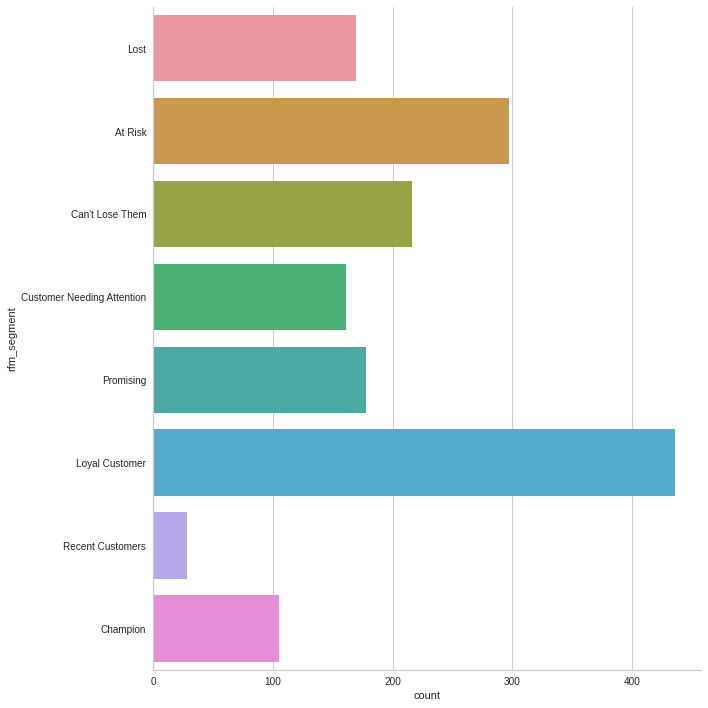

In [102]:
sns.catplot(
    y = "rfm_segment", 
    data = data_for_model.sort_values(by = ["rfm_score"], axis = 0), 
    kind = "count", 
    height = 10
);